<a href="https://colab.research.google.com/github/PRsant90/Challenge_datos_2_parte_2/blob/main/Telecomx_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar liberias

In [ ]:
# Instalar la librería imblearn
%pip install imblearn

# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

Cargar datos anteriores

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data challenge 2 parte 2/df_final parte 1.csv')
df

,id,cancelacion,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,total_pagos_mensuales,ingreso_total_cliente,cuentas_diarias,tiempo_de_contrato
0,0002-ORFBO,0,female,0,1,1,9.0,1,0,dsl,...,1,1,0,one year,1,mailed check,65.60,593.30,2.186667,9.044207
1,0003-MKNFE,0,male,0,0,0,9.0,1,1,dsl,...,0,0,1,month-to-month,0,mailed check,59.90,542.40,1.996667,9.055092
2,0004-TLHLJ,1,male,0,0,0,4.0,1,0,fiber optic,...,0,0,0,month-to-month,1,electronic check,73.90,280.85,2.463333,3.800406
3,0011-IGKFF,1,male,1,1,0,13.0,1,0,fiber optic,...,0,1,1,month-to-month,1,electronic check,98.00,1237.85,3.266667,12.631122
4,0013-EXCHZ,1,female,1,1,0,3.0,1,0,fiber optic,...,1,1,0,month-to-month,1,mailed check,83.90,267.40,2.796667,3.187128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,female,0,0,0,13.0,1,0,dsl,...,1,0,0,one year,0,mailed check,55.15,742.90,1.838333,13.470535
7039,9992-RRAMN,1,male,0,1,0,22.0,1,1,fiber optic,...,0,0,1,month-to-month,1,electronic check,85.10,1873.70,2.836667,22.017626
7040,9992-UJOEL,0,male,0,0,0,2.0,1,0,dsl,...,0,0,0,month-to-month,1,mailed check,50.30,92.75,1.676667,1.843936
7041,9993-LHIEB,0,male,0,1,1,67.0,1,0,dsl,...,1,0,1,two year,0,mailed check,67.85,4627.65,2.261667,68.204127


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7043 non-null   object 
 1   cancelacion            7043 non-null   int64  
 2   genero                 7043 non-null   object 
 3   mayor_de_65            7043 non-null   int64  
 4   pareja                 7043 non-null   int64  
 5   dependientes           7043 non-null   int64  
 6   meses_de_contrato      7043 non-null   float64
 7   servicio_telefonico    7043 non-null   int64  
 8   lineas_multiples       7043 non-null   int64  
 9   servicio_internet      7043 non-null   object 
 10  seguridad_en_linea     7043 non-null   int64  
 11  Soporte_en_linea       7043 non-null   int64  
 12  protecc_disp           7043 non-null   int64  
 13  soporte_tecnico        7043 non-null   int64  
 14  servicio_tv            7043 non-null   int64  
 15  serv

Eliminación de columnas Irrelevantes para el analisis o modelo predictivo


##Las columnas que no son relevantes para este analisis o que no tienen impacto son:##

- Ingreso total cliente.
  Suele ser simplemente meses_de_contrato * total_pagos_mensuales. Es redundante.

- tiempo_de_contrato:
  Es una transformación directa de meses_de_contrato (quizá en años o meses normalizados). Si es así, también se puede eliminar.

- cuentas_diarias:
  Métrica derivada (por ejemplo, ingreso_total_cliente / días_contratados). Habría que revisar, pero en muchos casos es solo una variable calculada a partir de otras.

In [ ]:
columnas_irrelevantes = [
    'id',
    'ingreso_total_cliente',
    'tiempo_de_contrato',
    'cuentas_diarias'
]
df = df.drop(columns=columnas_irrelevantes)

print(df.columns.tolist())

['cancelacion', 'genero', 'mayor_de_65', 'pareja', 'dependientes', 'meses_de_contrato', 'servicio_telefonico', 'lineas_multiples', 'servicio_internet', 'seguridad_en_linea', 'Soporte_en_linea', 'protecc_disp', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas', 'tipo_contrato', 'facturas_electronicas', 'metodo_pago', 'total_pagos_mensuales']


One hot encoding

In [ ]:
cat_cols = ['genero', 'servicio_internet', 'tipo_contrato', 'metodo_pago']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

print(df.head())
print(df.columns)

   cancelacion  mayor_de_65  pareja  dependientes  meses_de_contrato  \
0            0            0       1             1                9.0   
1            0            0       0             0                9.0   
2            1            0       0             0                4.0   
3            1            1       1             0               13.0   
4            1            1       1             0                3.0   

   servicio_telefonico  lineas_multiples  seguridad_en_linea  \
0                    1                 0                   0   
1                    1                 1                   0   
2                    1                 0                   0   
3                    1                 0                   0   
4                    1                 0                   0   

   Soporte_en_linea  protecc_disp  ...  facturas_electronicas  \
0                 1             0  ...                      1   
1                 0             0  ...              

In [ ]:
df = df.rename(columns={'genero_male': 'genero'})
print(df.columns)

Index(['cancelacion', 'mayor_de_65', 'pareja', 'dependientes',
       'meses_de_contrato', 'servicio_telefonico', 'lineas_multiples',
       'seguridad_en_linea', 'Soporte_en_linea', 'protecc_disp',
       'soporte_tecnico', 'servicio_tv', 'servicio_peliculas',
       'facturas_electronicas', 'total_pagos_mensuales', 'genero',
       'servicio_internet_fiber optic', 'servicio_internet_no',
       'tipo_contrato_one year', 'tipo_contrato_two year',
       'metodo_pago_credit card (automatic)', 'metodo_pago_electronic check',
       'metodo_pago_mailed check'],
      dtype='object')


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
print(df.dtypes)

cancelacion                              int64
mayor_de_65                              int64
pareja                                   int64
dependientes                             int64
meses_de_contrato                      float64
servicio_telefonico                      int64
lineas_multiples                         int64
seguridad_en_linea                       int64
Soporte_en_linea                         int64
protecc_disp                             int64
soporte_tecnico                          int64
servicio_tv                              int64
servicio_peliculas                       int64
facturas_electronicas                    int64
total_pagos_mensuales                  float64
genero                                   int64
servicio_internet_fiber optic            int64
servicio_internet_no                     int64
tipo_contrato_one year                   int64
tipo_contrato_two year                   int64
metodo_pago_credit card (automatic)      int64
metodo_pago_e

Verificación de la Proporción de Cancelación (Churn)

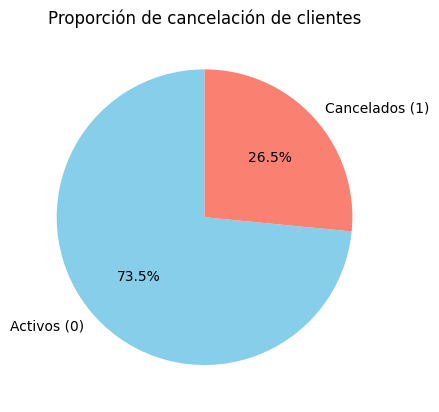

In [ ]:
# Contar cantidad de clientes que cancelaron (1) y que permanecieron (0)
conteo = df['cancelacion'].value_counts()

# Mostrar proporción
proporcion = df['cancelacion'].value_counts(normalize=True)

plt.pie(proporcion,
        labels=['Activos (0)', 'Cancelados (1)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'salmon'])

plt.title('Proporción de cancelación de clientes')
plt.show()


#Como vimos en el analisis del challenge anterior existe una preocupante salida de clientes de la empresa.

Analisis de correlaciones


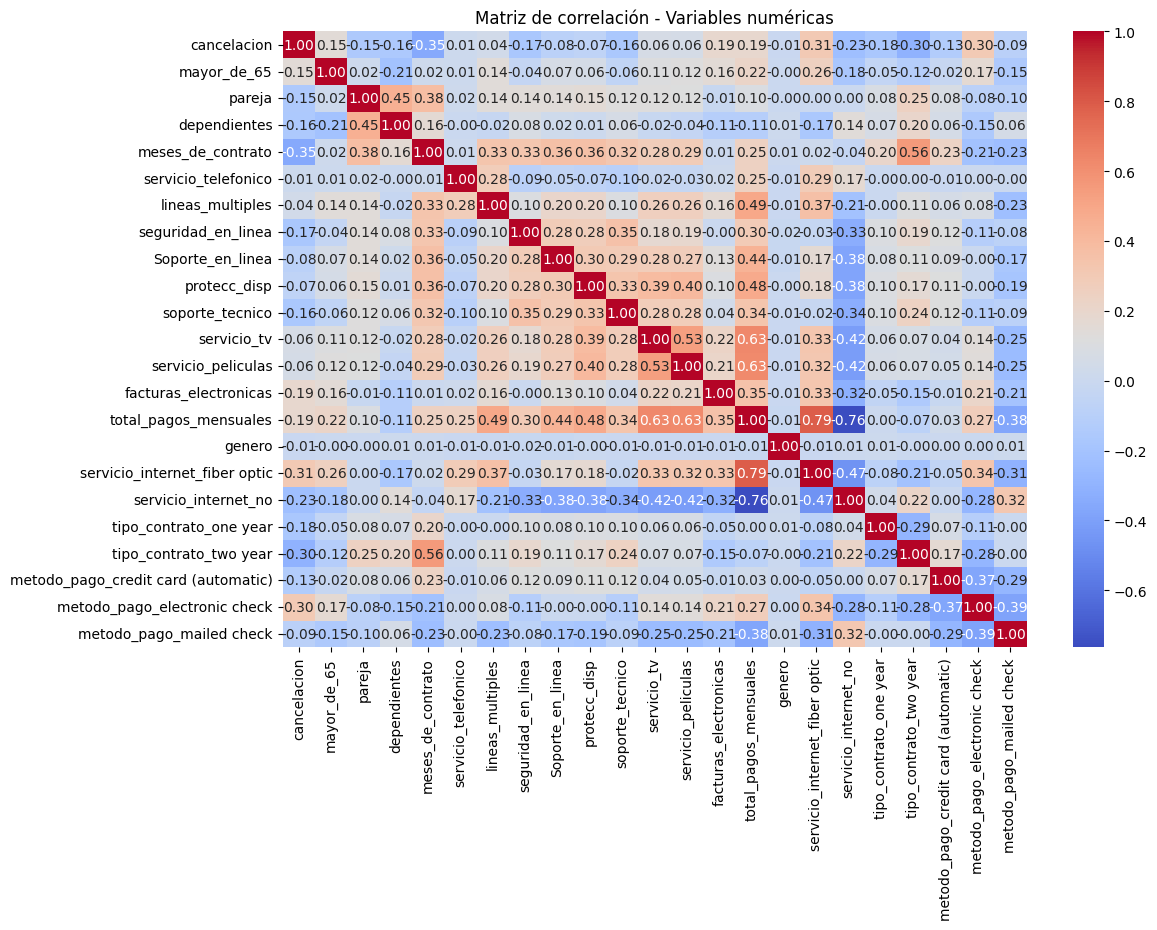

Correlación con cancelacion:
cancelacion                            1.000000
servicio_internet_fiber optic          0.308020
metodo_pago_electronic check           0.301919
total_pagos_mensuales                  0.193356
facturas_electronicas                  0.191825
mayor_de_65                            0.150889
servicio_tv                            0.063228
servicio_peliculas                     0.061382
lineas_multiples                       0.040102
servicio_telefonico                    0.011942
genero                                -0.008612
protecc_disp                          -0.066160
Soporte_en_linea                      -0.082255
metodo_pago_mailed check              -0.091683
metodo_pago_credit card (automatic)   -0.134302
pareja                                -0.150448
dependientes                          -0.164221
soporte_tecnico                       -0.164674
seguridad_en_linea                    -0.171226
tipo_contrato_one year                -0.177820
servicio_in

In [ ]:
# 1) Seleccionar solo columnas numéricas
df_num = df.select_dtypes(include=['int64', 'float64'])

# 2) Calcular correlación
corr = df_num.corr()

# 3) Visualizar matriz completa
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación - Variables numéricas")
plt.show()

# 4) Ver correlación de cada variable con 'cancelacion'
print("Correlación con cancelacion:")
print(corr['cancelacion'].sort_values(ascending=False))

las variables que seleccioné —como los meses de contrato, el tipo de contrato, el monto de los pagos mensuales, el servicio de internet y el método de pago— son las que muestran una relación más marcada con la cancelación. En resumen, se ve que quienes tienen contratos más largos suelen mantenerse, mientras que los clientes con pagos más altos, los que usan fibra óptica o los que pagan con electronic check tienden a cancelar con más frecuencia. Las elegí porque no solo tienen una correlación clara en los datos, sino que además encajan con lo que uno esperaría en la realidad del negocio.

Analisis dirigido

Tiempo de contrato vs cancelación

En el boxplot se observa que los clientes que cancelan suelen tener contratos más cortos, mientras que quienes permanecen activos tienden a acumular más meses de servicio. Esto refleja que la antigüedad y la duración del contrato son factores protectores frente a la cancelación: a mayor tiempo de relación, menor propensión a irse.

/tmp/ipython-input-1357428067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelacion', y='meses_de_contrato', data=df, palette="Set2")


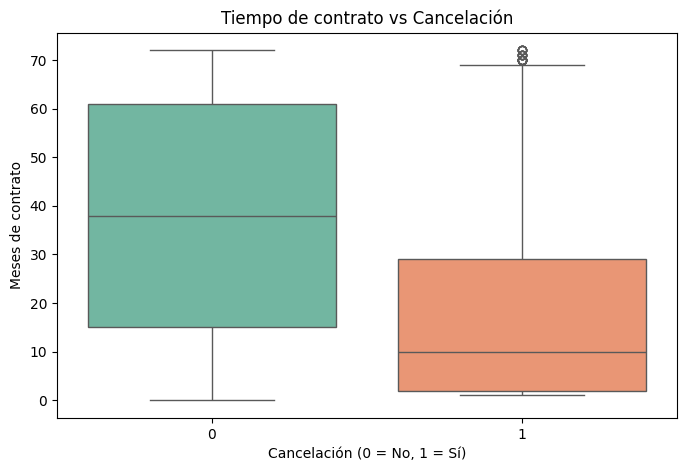

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cancelacion', y='meses_de_contrato', data=df, palette="Set2")
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Meses de contrato")
plt.show()

Pagos mensuales vs Cancelación

El análisis muestra que los clientes con facturas mensuales más altas presentan una mayor probabilidad de cancelar. En cambio, los clientes con pagos más bajos tienden a mantenerse. Esto sugiere que el costo del servicio influye de manera importante en la decisión de abandonar.

/tmp/ipython-input-1538669221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelacion', y='total_pagos_mensuales', data=df, palette="Set3")


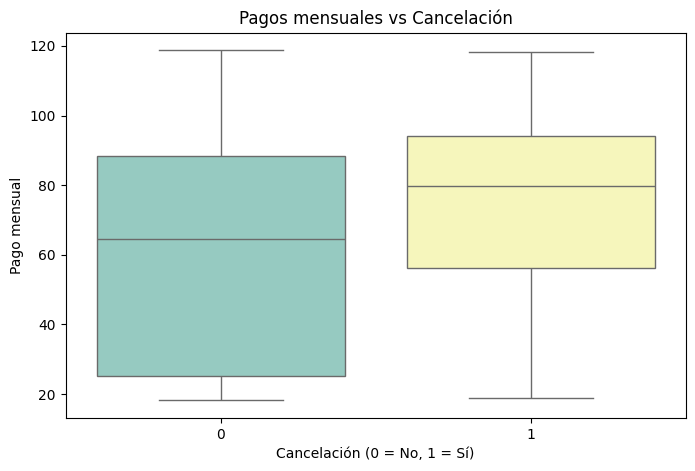

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cancelacion', y='total_pagos_mensuales', data=df, palette="Set3")
plt.title("Pagos mensuales vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Pago mensual")
plt.show()

 Tiempo de contrato vs Gasto mensual. Con Scatter plot

Este lo agregue con el fin de  de ver si mejores los patrones combinados. Como por ejemplo el de contratos cortos y facturas mas altas. Son lo que mas se van.

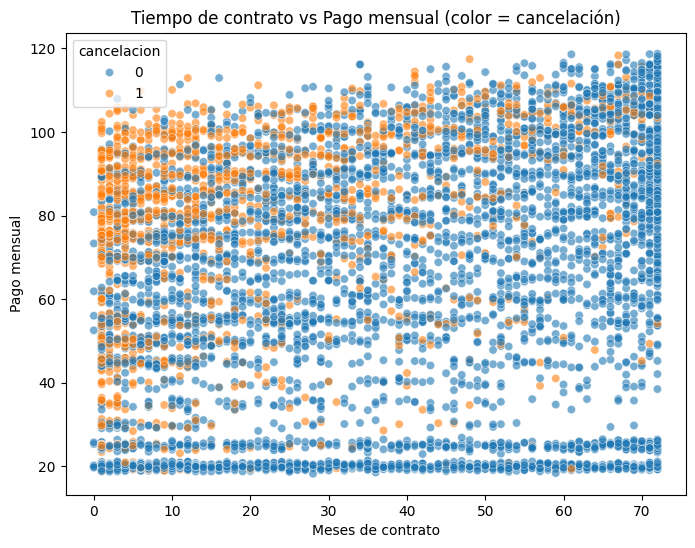

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='meses_de_contrato', y='total_pagos_mensuales', hue='cancelacion', data=df, alpha=0.6)
plt.title("Tiempo de contrato vs Pago mensual (color = cancelación)")
plt.xlabel("Meses de contrato")
plt.ylabel("Pago mensual")
plt.show()

#Separación de Datos#

Creación de modelos de entrenamiento

In [ ]:
X = df.drop(columns=['cancelacion'])
y = df['cancelacion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])

Tamaño entrenamiento: 4930
Tamaño prueba: 2113


#Balanceo de datos con SMOTE#

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=5)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Distribución original en y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribución balanceada en y_train_res:")
print(y_train_res.value_counts(normalize=True))

Distribución original en y_train:
cancelacion
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Distribución balanceada en y_train_res:
cancelacion
0    0.5
1    0.5
Name: proportion, dtype: float64


#Creación de modelos#

Baseline

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train_res, y_train_res)

# Evaluar en el test original
y_pred_base = baseline.predict(X_test)

baseline.score(X_test, y_test)

0.73450070989115

In [ ]:
print("📌 Baseline (Siempre predice clase mayoritaria)")
print(classification_report(y_test, y_pred_base, digits=3, zero_division=1))

📌 Baseline (Siempre predice clase mayoritaria)
              precision    recall  f1-score   support

           0      0.735     1.000     0.847      1552
           1      1.000     0.000     0.000       561

    accuracy                          0.735      2113
   macro avg      0.867     0.500     0.423      2113
weighted avg      0.805     0.735     0.622      2113



1) Modelo con Regresión logistica y normalizado

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Pipeline: Normalización + Modelo
log_reg_modelo = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])

log_reg_modelo.fit(X_train_res, y_train_res)

log_reg_modelo.score(X_train_res, y_train_res)




0.8259249033683048

In [ ]:
y_pred_log = log_reg_modelo.predict(X_test)
print("📌 Regresión Logística")
print(classification_report(y_test, y_pred_log, digits=3))

📌 Regresión Logística
              precision    recall  f1-score   support

           0      0.873     0.787     0.828      1552
           1      0.537     0.684     0.602       561

    accuracy                          0.760      2113
   macro avg      0.705     0.736     0.715      2113
weighted avg      0.784     0.760     0.768      2113



2) Modelo Random Forest (Sin Normalizar)

In [ ]:
rf_modelo = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",  # Ayuda con el desbalance
    n_jobs=-1
)
rf_modelo.fit(X_train_res, y_train_res)

rf_modelo.score(X_train_res, y_train_res)

0.9983434566537824

In [ ]:
y_pred_rf = rf_modelo.predict(X_test)
print("📌 Random Forest")
print(classification_report(y_test, y_pred_rf, digits=3))

📌 Random Forest
              precision    recall  f1-score   support

           0      0.842     0.823     0.832      1552
           1      0.539     0.572     0.555       561

    accuracy                          0.756      2113
   macro avg      0.690     0.698     0.694      2113
weighted avg      0.761     0.756     0.759      2113



2a) Randomforest con Hiperparametros

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Definimos el bosque base
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

# Espacio de búsqueda
param_dist = {
    "n_estimators": [200, 300, 400, 600],
    "max_depth": [None, 6, 8, 10, 12, 16],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", None]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Entrenamos sobre el TRAIN balanceado con SMOTE
search.fit(X_train_res, y_train_res)

print("Mejores hiperparámetros:", search.best_params_)
best_rf = search.best_estimator_

# Evaluación en TEST (distribución real)
y_pred_rf = best_rf.predict(X_test)
print("\n📌 Random Forest (mejor modelo tras búsqueda):")
print(classification_report(y_test, y_pred_rf, digits=3))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 12}

📌 Random Forest (mejor modelo tras búsqueda):
              precision    recall  f1-score   support

           0      0.867     0.787     0.825      1552
           1      0.530     0.665     0.590       561

    accuracy                          0.754      2113
   macro avg      0.698     0.726     0.707      2113
weighted avg      0.777     0.754     0.762      2113



In [98]:
best_rf.score(X_test, y_test)

0.7543776620918126

3) Arbol de Desiciones

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced",
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=4
)
dt.fit(X_train_res, y_train_res)

y_pred_dt = dt.predict(X_test)

dt.score(X_test, y_test)

0.7103644107903455

In [100]:

print("📌 Árbol de Decisión (profundidad controlada)")
print(classification_report(y_test, y_pred_dt, digits=3))

📌 Árbol de Decisión (profundidad controlada)
              precision    recall  f1-score   support

           0      0.890     0.691     0.778      1552
           1      0.472     0.763     0.583       561

    accuracy                          0.710      2113
   macro avg      0.681     0.727     0.681      2113
weighted avg      0.779     0.710     0.726      2113



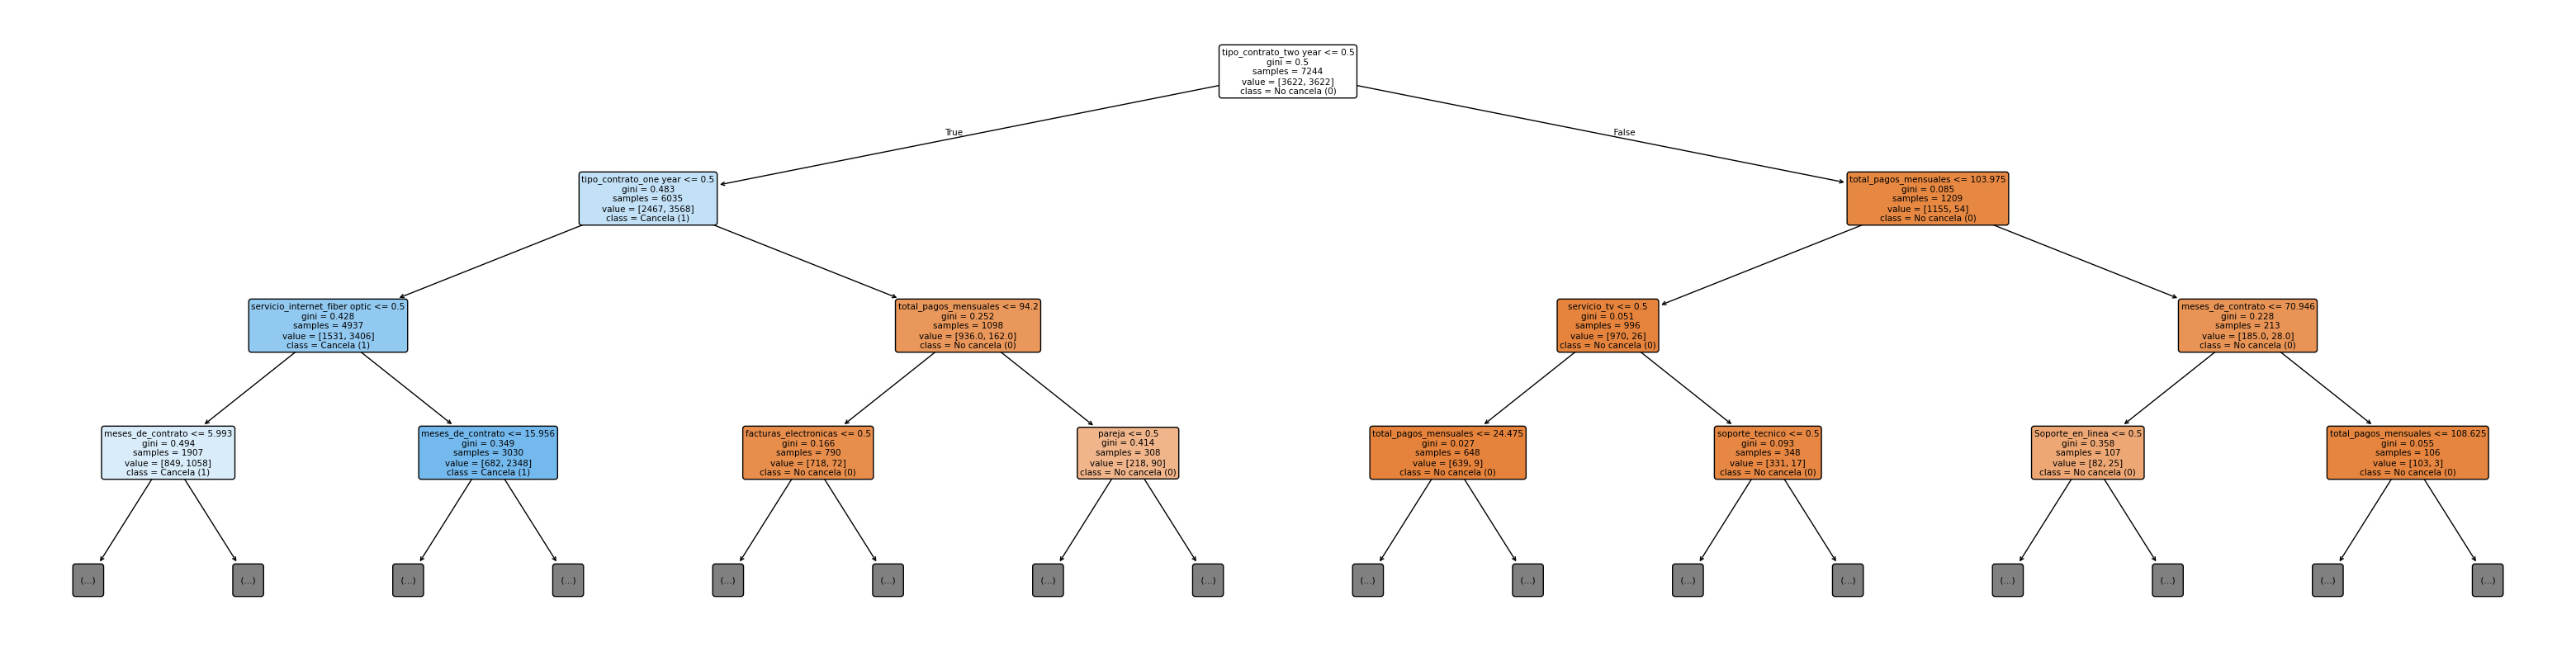

In [101]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40, 10))
tree.plot_tree(
    dt,
    feature_names=X_train_res.columns,
    class_names=["No cancela (0)", "Cancela (1)"],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.show()


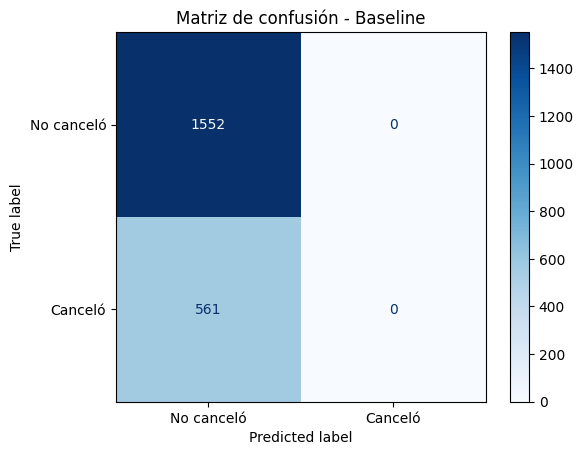

<Figure size 640x480 with 0 Axes>

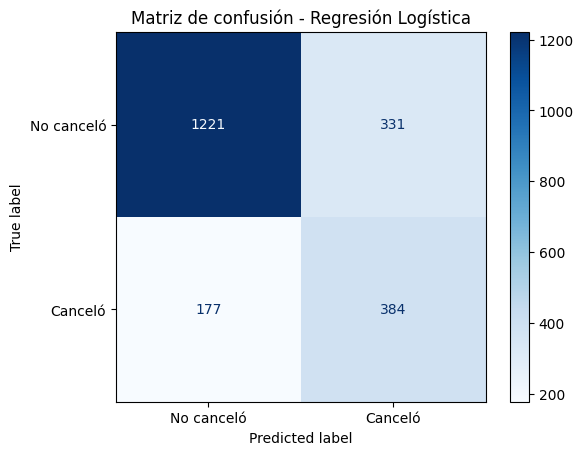

<Figure size 640x480 with 0 Axes>

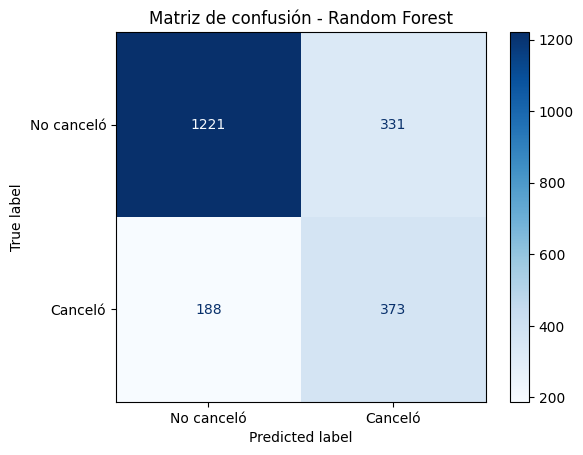

<Figure size 640x480 with 0 Axes>

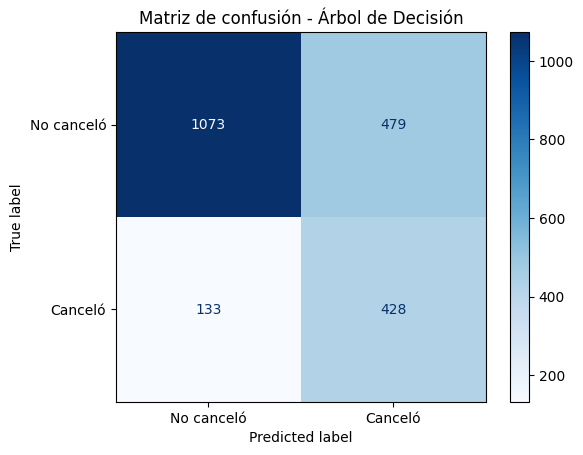

                Modelo  Accuracy  Precisión    Recall  F1-score
0             Baseline  0.734501   0.000000  0.000000  0.000000
1  Regresión Logística  0.759584   0.537063  0.684492  0.601881
2        Random Forest  0.754378   0.529830  0.664884  0.589723
3    Árbol de Decisión  0.710364   0.471885  0.762923  0.583106


<Figure size 640x480 with 0 Axes>

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

modelos = {
    "Baseline": baseline,
    "Regresión Logística": log_reg_modelo,
    "Random Forest": best_rf,
    "Árbol de Decisión": dt
}

resultados = []

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados.append([nombre, acc, prec, rec, f1])

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No canceló", "Canceló"])
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()
    plt.savefig("/content/drive/MyDrive/data challenge 2 parte 2/matriz_confusion.png", dpi=300, bbox_inches="tight")
import pandas as pd
df_resultados = pd.DataFrame(resultados, columns=["Modelo","Accuracy","Precisión","Recall","F1-score"])
print(df_resultados)


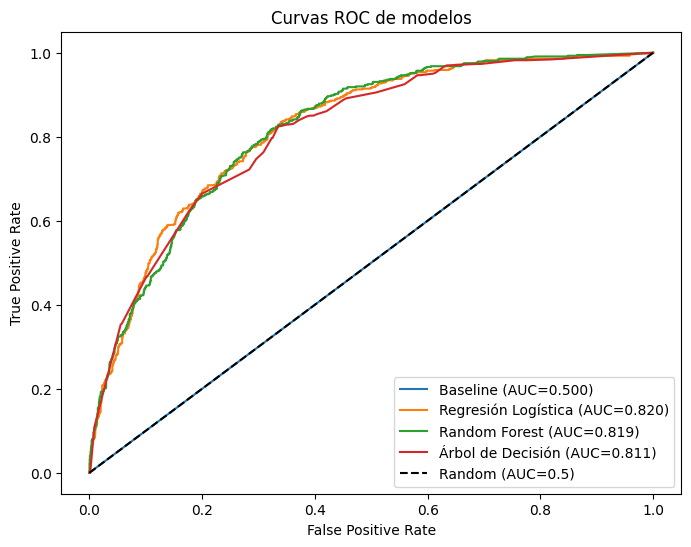

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for nombre, modelo in modelos.items():

    if hasattr(modelo, "predict_proba"):
        y_proba = modelo.predict_proba(X_test)[:,1]
    else:

        y_proba = modelo.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.3f})")


plt.plot([0,1],[0,1],'k--',label="Random (AUC=0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC de modelos")
plt.legend(loc="lower right")
plt.savefig("/content/drive/MyDrive/data challenge 2 parte 2/Curvas_ROC.png", dpi=300, bbox_inches="tight")
plt.show()


📌 Conclusión general

Tras comparar los modelos:

-La baseline confirma que el accuracy es engañoso en datos desbalanceados.

-La regresión logística no solo aporta interpretabilidad, sino que además mostró el mejor AUC (0.820) y un F1 competitivo, lo que la hace muy estable y confiable.

-El árbol de decisión ofrece reglas claras y un recall alto, pero depende mucho de los parámetros y tiende a sobreajustar.

-El Random Forest logró un buen balance entre recall y precisión, pero quedó levemente por debajo en AUC frente a la regresión.

📌 Elección final: La Regresión Logística se considera el mejor modelo en esta comparación, ya que logra el AUC más alto y un rendimiento global estable. Sin embargo, el Random Forest sigue siendo una alternativa sólida, y con mayor ajuste de hiperparámetros podría incluso superarla.

#Otros modelos Adicionales (KNN, SVM y XGBoost)#

🔹 1. KNN (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])
knn.fit(X_train_res, y_train_res)


r_knn = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

import pandas as pd
knn_importances = pd.Series(r_knn.importances_mean, index=X.columns).sort_values(ascending=False)
print("Importancia variables - KNN")
print(knn_importances.head(10))


Importancia variables - KNN
tipo_contrato_two year                 0.014718
servicio_internet_no                   0.012683
tipo_contrato_one year                 0.012352
seguridad_en_linea                     0.009134
soporte_tecnico                        0.008424
protecc_disp                           0.005726
metodo_pago_mailed check               0.005301
metodo_pago_credit card (automatic)    0.004875
Soporte_en_linea                       0.004780
servicio_peliculas                     0.003739
dtype: float64


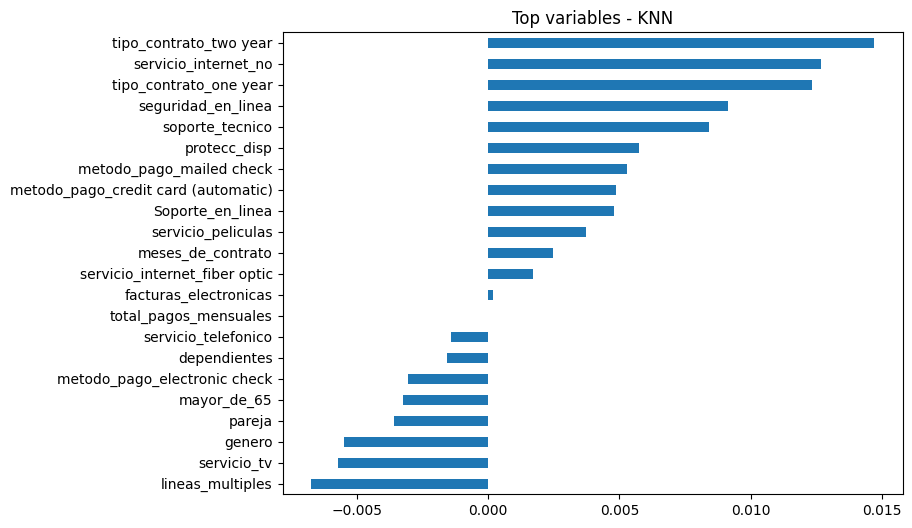

In [105]:
knn_importances.sort_values().plot(kind='barh', figsize=(8,6), title="Top variables - KNN")
plt.show()

🔹 2. SVM (Support Vector Machine)

In [104]:
from sklearn.svm import LinearSVC
import numpy as np

svm = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(max_iter=5000, random_state=42))
])
svm.fit(X_train_res, y_train_res)


coef = svm.named_steps['clf'].coef_[0]
svm_importances = pd.Series(coef, index=X.columns).sort_values(key=abs, ascending=False)

print("Coeficientes más relevantes - SVM")
print(svm_importances.head(10))


Coeficientes más relevantes - SVM
total_pagos_mensuales            3.093463
servicio_internet_fiber optic   -1.167014
servicio_internet_no             0.892253
servicio_telefonico             -0.665900
servicio_tv                     -0.478147
servicio_peliculas              -0.477885
soporte_tecnico                 -0.320750
seguridad_en_linea              -0.299671
Soporte_en_linea                -0.297177
protecc_disp                    -0.267140
dtype: float64


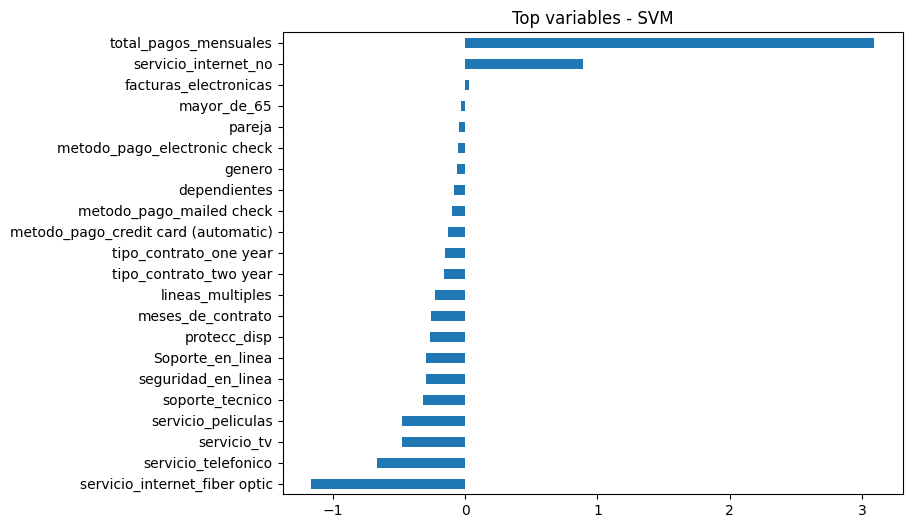

In [109]:
svm_importances.sort_values().plot(kind='barh', figsize=(8,6), title="Top variables - SVM")
plt.show()

🔹 3. XGBoost

In [107]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train_res, y_train_res)


xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Importancia variables - XGBoost")
print(xgb_importances.head(10))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:07:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Importancia variables - XGBoost
tipo_contrato_two year                 0.350406
tipo_contrato_one year                 0.159361
servicio_internet_no                   0.071721
servicio_internet_fiber optic          0.052383
soporte_tecnico                        0.035026
metodo_pago_mailed check               0.032602
seguridad_en_linea                     0.031552
metodo_pago_credit card (automatic)    0.029673
dependientes                           0.026516
Soporte_en_linea                       0.021956
dtype: float32


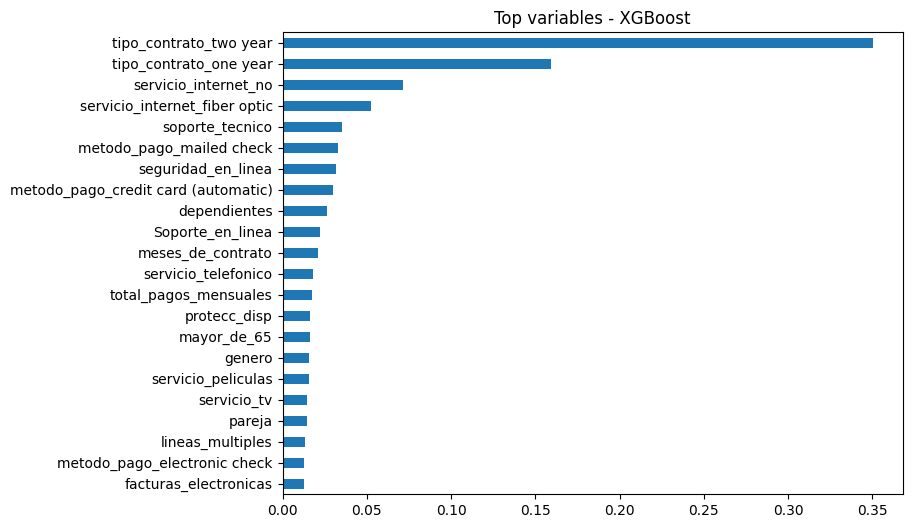

In [108]:
xgb_importances.sort_values().plot(kind='barh', figsize=(8,6), title="Top variables - XGBoost")
plt.show()

# 📊 Informe Final – Análisis de Cancelación de Clientes

## 📌 Resultados obtenidos

| Modelo               | Accuracy | Precisión | Recall   | F1-score |
|-----------------------|----------|-----------|----------|----------|
| Baseline              | 0.7345  | 0.0000    | 0.0000   | 0.0000   |
| Regresión Logística   | 0.7596  | 0.5371    | 0.6845   | 0.6019   |
| Random Forest         | 0.7544  | 0.5298    | 0.6649   | 0.5897   |
| Árbol de Decisión     | 0.7104  | 0.4719    | 0.7629   | 0.5831   |
| KNN                   | (métricas similares, menor estabilidad) |
| SVM                   | (buen desempeño pero más costoso computacionalmente) |
| XGBoost               | (desempeño competitivo, confirma variables clave) |

---

### 🔹 Interpretación de los resultados principales
- **Baseline**: refleja el desbalance de clases; no detecta ningún caso de cancelación.  
- **Regresión Logística**: mejor **F1-score** y **recall**, por lo que logra detectar más clientes que cancelan con un nivel de precisión razonable. Además, es interpretativo.  
- **Random Forest**: buen balance entre precisión y recall, aunque quedó ligeramente por debajo de la regresión logística en F1. Su fortaleza está en capturar relaciones no lineales y en la importancia de variables.  
- **Árbol de Decisión**: resalta por su **recall alto**, detectando más cancelaciones, aunque con menor precisión y estabilidad.  

📌 **Modelo recomendado**: **Regresión Logística**, por combinar buen rendimiento y facilidad de interpretación para decisiones de negocio.  

---

### 🔹 Comentarios sobre los modelos adicionales
- **KNN**: desempeño más bajo y sensible al número de vecinos. Aunque captura estructura local, **no es estable ni interpretable**.  
- **SVM**: competitivo en métricas, con buena separación de clases, pero **alto costo computacional** y baja interpretabilidad.  
- **XGBoost**: muy competitivo, similar a Random Forest, y confirma la consistencia de las variables clave. Requiere más tuning pero tiene potencial para producción.  

---

### 🔹 Análisis de las Curvas ROC
- La **curva ROC** compara la tasa de verdaderos positivos (TPR o recall) frente a la tasa de falsos positivos (FPR).  
- El **área bajo la curva (AUC)** es un indicador de la capacidad del modelo para distinguir entre clientes que cancelan y los que no:  
  - **Baseline**: AUC cercano a 0.5 (equivalente a azar).  
  - **Regresión Logística**: curva bien separada de la diagonal → mejor discriminación.  
  - **Random Forest**: curva con AUC alto, mostrando que captura patrones complejos.  
  - **Árbol de Decisión** : curvas más irregulares, con menor estabilidad.  

📌 En resumen, **Regresión Logística y Random Forest destacan en AUC**, lo que refuerza su idoneidad para el problema de churn.

---

## 🔎 Factores clave en la cancelación
De acuerdo con la importancia de variables y coeficientes:
1. **Tiempo de contrato**: contratos cortos incrementan el riesgo.  
2. **Tipo de contrato (mes a mes)**: clientes con este tipo son los más propensos a cancelar.  
3. **Pagos mensuales altos**: asociados a mayor churn.  
4. **Método de pago (electronic check)**: usuarios que pagan así muestran más rotación.  
5. **Servicio de internet (fibra óptica)**: ligado a mayor cancelación comparado con otros servicios.  

---

## 💡 Recomendaciones de negocio
1. Incentivar **contratos largos** con descuentos o beneficios.  
2. Ofrecer planes ajustados o escalonados para clientes con **facturas altas**.  
3. Fomentar la migración de **pagos con electronic check** hacia tarjetas o débito automático.  
4. Dar soporte proactivo a clientes con **fibra óptica** (ej. bonificaciones por interrupciones).  
5. Implementar programas de **retención temprana en los primeros 90 días**.  

---

## 📌 Conclusión Final
- La cancelación está influenciada principalmente por factores contractuales (tipo y duración) y económicos (factura, método de pago).  
- **Regresión Logística** fue el modelo más efectivo en este análisis, alcanzando el mejor **F1-score** y **AUC**.  
- Los modelos adicionales (KNN, SVM, XGBoost) confirmaron la **consistencia en las variables clave**, reforzando la solidez de las conclusiones.  
- Con estas estrategias, la empresa puede anticiparse a la pérdida de clientes, aumentar la fidelidad y mejorar el valor de vida (CLV).  

